In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
print ('hello world');

hello world


In [3]:
df = pd.DataFrame({'a': [2, 4, 6, 8], 'b': [1, 3, 5, 7]})
print (df)

,a,b
0,2,1
1,4,3
2,6,5
3,8,7


In [ ]:
import pandas as pd

df = pd.DataFrame({'a': [2, 4, 6, 8], 'b': [1, 3, 5, 7]})

In [5]:
print (df.T)

   0  1  2  3
a  2  4  6  8
b  1  3  5  7


In [9]:
import unicodecsv

enrollments = []
f = open('../data/lesson01/enrollments.csv', 'rb')
readIterator = unicodecsv.DictReader(f)

for row in readIterator:
    enrollments.append(row)
    
enrollments[0]
    


OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [11]:
import unicodecsv

enrollments = []
with open('../data/lesson01/enrollments.csv', 'rb') as f:
    readIterator = unicodecsv.DictReader(f)
    enrollments = list (readIterator)
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [190]:
engagement_filename = '../data/lesson01/daily_engagement.csv'
submissions_filename = '../data/lesson01/project_submissions.csv'

def read_csv(fileName):
    with open(fileName, 'rb') as f:
        readIterator = unicodecsv.DictReader(f)
        return list (readIterator)
    
enrollments = read_csv('../data/enrollments.csv')
daily_engagement = read_csv(engagement_filename);
project_submissions = read_csv(submissions_filename);

daily_engagement[0]

    

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [191]:
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

In [192]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [193]:
from datetime import datetime as dt


def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')
    

def parse_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
def parse_float(i):
    if i == '':
        return None
    else:
        return float(i)
    
def parse_bool(boolean):
    if boolean == '':
        return None
    else:
        return boolean =='True'    

# Python does not have switch statment, rather use dict approach
parser = {
        'int':parse_int,
        'date':parse_date,
        'bool':parse_bool
    }
    

#parser.get('int')('1')
#parser.get('date')('2001-1-1') 
#parser['date'] ('2001-1-1') ## another 




In [194]:
for submission in project_submissions:
    submission['creation_date'] = parse_date(submission['creation_date'])
    submission['completion_date'] = parse_date(submission['completion_date'])
    
print ('project_submissions', project_submissions[0])

project_submissions OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)), ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)), ('assigned_rating', 'UNGRADED'), ('account_key', '256'), ('lesson_key', '3176718735'), ('processing_state', 'EVALUATED')])


In [195]:
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    enrollment['days_to_cancel'] = parse_int(enrollment['days_to_cancel'])
    enrollment['is_udacity'] = parse_bool(enrollment['is_udacity'])
    enrollment['is_canceled'] = parse_bool(enrollment['is_canceled'])
    
print ('enrollments', enrollments[0])


enrollments OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


In [196]:
for engagment in daily_engagement:
    engagment['utc_date'] = parse_date(engagment['utc_date'])    
    engagment['num_courses_visited'] = parse_int(parse_float(engagment['num_courses_visited']))
    engagment['total_minutes_visited'] = parse_float(engagment['total_minutes_visited'])
    engagment['lessons_completed'] = parse_int(parse_float(engagment['lessons_completed']))
    engagment['projects_completed'] = parse_int(parse_float(engagment['projects_completed']))
    
    # new computed column
    if(engagment['num_courses_visited'] > 0): 
        engagment['has_visited'] =   1
    else:
        engagment['has_visited'] =  0
    
print ('daily_engagement', daily_engagement[0])

daily_engagement OrderedDict([('acct', '0'), ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 11.6793745), ('lessons_completed', 0), ('projects_completed', 0), ('has_visited', 1)])


In [197]:
def unique_keys(items, key):
    unique = set()
    for item in items:
        unique.add(item[key])
    return unique


print ('enrollments', len(enrollments), len(unique_keys(enrollments,'account_key')))
print ('daily_engagement', len(daily_engagement), len(unique_keys(daily_engagement,'acct')))
print ('project_submissions', len(project_submissions), len(unique_keys(project_submissions,'account_key')))
    

enrollments 1640 1302
daily_engagement 136240 1237
project_submissions 3642 743


In [198]:
for engagment in daily_engagement:
    engagment['account_key'] = engagment['acct']    
    del engagment['acct']   
    
daily_engagement [0]['account_key']
    

'0'

In [199]:
unique_enrollment_keys = unique_keys(enrollments,'account_key')
unique_engagement_keys = unique_keys(daily_engagement,'account_key')

print ('Enrollment keys missing in engagement',len(unique_enrollment_keys.difference(unique_engagement_keys)))
print ('Engagement keys missing in Enroment',unique_engagement_keys.difference(unique_enrollment_keys))


Enrollment keys missing in engagement 65
Engagement keys missing in Enroment set()


In [200]:
num_problem_students = 0

for enrollment in enrollments:
    account_key = enrollment['account_key']
    if(account_key not in unique_engagement_keys) and enrollment['join_date'] != enrollment['cancel_date']:
        num_problem_students += 1;
        print (enrollment)

num_problem_students
                                                                                        

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


3

In [201]:
udacity_test_accounts = set()

for enrollment in enrollments:
    if(enrollment['is_udacity']):
        udacity_test_accounts.add(enrollment['account_key'])

len(udacity_test_accounts)

6

In [202]:
def remove_test_accounts(data):
    non_udacity_data = []
    for item in data:
        if(item['account_key'] not in udacity_test_accounts):
            non_udacity_data.append(item)
    return non_udacity_data



In [203]:
non_udacity_enrollments = remove_test_accounts(enrollments)
non_udacity_engagement = remove_test_accounts(daily_engagement)
non_udacity_submissions = remove_test_accounts(project_submissions)

print ('non_udacity_enrollments', len(non_udacity_enrollments))
print ('non_udacity_engagement', len(non_udacity_engagement))
print ('non_udacity_submissions', len(non_udacity_submissions))


non_udacity_enrollments 1622
non_udacity_engagement 135656
non_udacity_submissions 3634


In [204]:
paid_students = {}

for enrollment in non_udacity_enrollments:
    if(enrollment['days_to_cancel'] == None or enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        join_date = enrollment['join_date']
        if(account_key not in paid_students or join_date > paid_students[account_key]):
            paid_students[account_key] = join_date

len(paid_students)

995

In [205]:
def remove_free_trial_cancels(data):
    paid_data = []
    for item in data:
        if(item['account_key'] in paid_students):
            paid_data.append(item)
    
    return paid_data    
    

In [206]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions= remove_free_trial_cancels(non_udacity_submissions)

print ('paid_enrollments', len(paid_enrollments))
print ('paid_engagement', len(paid_engagement))
print ('paid_submissions', len(paid_submissions))

paid_enrollments 1293
paid_engagement 134549
paid_submissions 3618


In [208]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >=0

#non_udacity_engagement[0]

In [209]:
paid_engagement_in_first_week = []

for engagement in paid_engagement:
    if(within_one_week(paid_students[engagement['account_key']],engagement['utc_date'] )):
        paid_engagement_in_first_week.append(engagement)
        
len(paid_engagement_in_first_week)

6919

In [210]:
# Set - Account Key -> [Engagement]

from collections import defaultdict

def group_by_key(data, key):
    
    grouped_data = defaultdict(list)
    
    for item in data:
        grouped_data[item[key]].append(item)
    
    return grouped_data

engagement_by_account = group_by_key(paid_engagement_in_first_week, 'account_key')

print ('engagement_by_account', len(engagement_by_account))

engagement_by_account 995


In [211]:

def aggregate_data(grouped_data, agg_column):
    total_by_account = {}
    for account_key, engagement_for_student in grouped_data.items():
        total_by_account[account_key] = 0
        for engagement in engagement_for_student:
            total_by_account[account_key] += engagement[agg_column]                
    return total_by_account


In [259]:
def describe_data(grouped_data, agg_column):
    agg_column_data = aggregate_data(grouped_data, agg_column)
    totals = list(agg_column_data.values())
    #total_minutes
    print ('############## ' + agg_column + ' ##############')
    print ('Mean:' , np.mean(totals))
    print ('Standard deviation:', np.std(totals))
    print ('Minimum:', np.min(totals))
    print ('Maximum:', np.max(totals))
    #print ('Average:', np.avg(totals))
    
    plt.ylabel('Count')
    plt.xlabel(agg_column)
    plt.hist(totals, bins=10)

    print ('############## END ##############')

############## total_minutes_visited ##############
Mean: 306.70832675342825
Standard deviation: 412.99693340852957
Minimum: 0.0
Maximum: 3564.7332644989997
############## END ##############


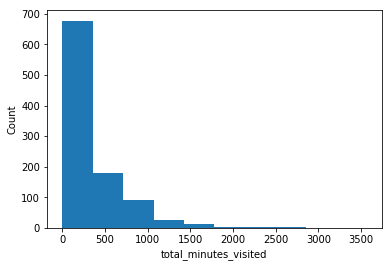

In [260]:
engagement_by_account = group_by_key(paid_engagement_in_first_week, 'account_key')
describe_data(engagement_by_account, 'total_minutes_visited')

############## lessons_completed ##############
Mean: 1.636180904522613
Standard deviation: 3.002561299829423
Minimum: 0
Maximum: 36
############## END ##############


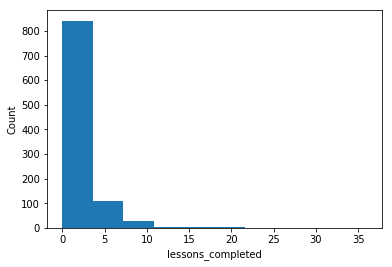

In [261]:
engagement_by_account = group_by_key(paid_engagement_in_first_week, 'account_key')
describe_data(engagement_by_account, 'lessons_completed')

############## projects_completed ##############
Mean: 0.006030150753768844
Standard deviation: 0.08946417320308696
Minimum: 0
Maximum: 2
############## END ##############


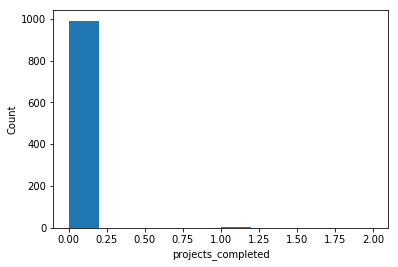

In [262]:
engagement_by_account = group_by_key(paid_engagement_in_first_week, 'account_key')
describe_data(engagement_by_account, 'projects_completed')

############## has_visited ##############
Mean: 2.8673366834170855
Standard deviation: 2.2551980029196814
Minimum: 0
Maximum: 7
############## END ##############


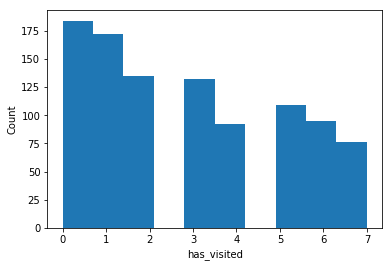

In [263]:
engagement_by_account = group_by_key(paid_engagement_in_first_week, 'account_key')
describe_data(engagement_by_account, 'has_visited')

In [264]:
paid_engagement_in_first_week[0]
#paid_submissions[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('has_visited', 1),
             ('account_key', '0')])

In [265]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

eval_processing_status = ['EVALUATED']
passed_rating = ['PASSED','DISTINCTION']
failed_ratings = [None,'INCOMPLETE','UNGRADED']


def filter_submissions_by(ratings, lessons):
    filted_data =set()
    for submission in paid_submissions:
        if(submission['lesson_key'] in lessons \
           and submission['processing_state'] in eval_processing_status \
           and submission['assigned_rating'] in ratings  ):
             filted_data.add(submission['account_key'])
    
    return filted_data

passed_subway_project = filter_submissions_by(passed_rating, subway_project_lesson_keys)
failed_subway_project = filter_submissions_by(failed_ratings, subway_project_lesson_keys)

print ('passed_subway_project', len(passed_subway_project))
print ('failed_subway_project', len(failed_subway_project))


passed_subway_project 647
failed_subway_project 481


In [266]:
passing_engagement = []
non_passing_engagement =[]

for enagaement_rec in paid_engagement_in_first_week:
    if(enagaement_rec['account_key']) in passed_subway_project: 
        passing_engagement.append(enagaement_rec)
    else:
        non_passing_engagement.append(enagaement_rec)


print ('passing_engagement', len(passing_engagement))
print ('non_passing_engagement', len(non_passing_engagement))

passing_engagement 4527
non_passing_engagement 2392


############## has_visited ##############
Mean: 3.384853168469861
Standard deviation: 2.2588214709184595
Minimum: 0
Maximum: 7
############## END ##############


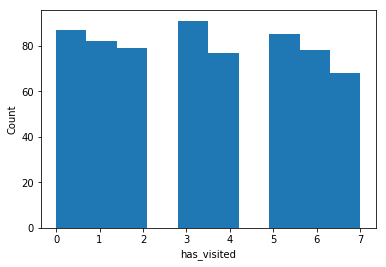

In [267]:

passed_engagements = group_by_key(passing_engagement , 'account_key')
describe_data(passed_engagements, 'has_visited')


############## lessons_completed ##############
Mean: 2.052550231839258
Standard deviation: 3.1422270555779344
Minimum: 0
Maximum: 36
############## END ##############


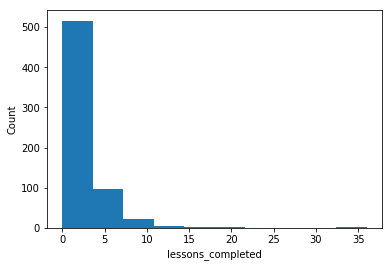

In [268]:
describe_data(passed_engagements, 'lessons_completed')

############## total_minutes_visited ##############
Mean: 394.58604648350865
Standard deviation: 448.4995193265521
Minimum: 0.0
Maximum: 3564.7332644989997
############## END ##############


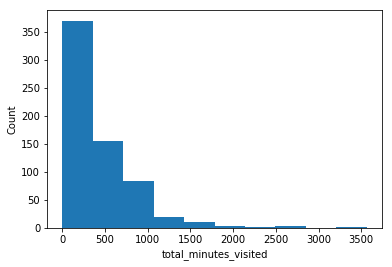

In [269]:
describe_data(passed_engagements, 'total_minutes_visited')

In [273]:

failed_data = group_by_key(non_passing_engagement , 'account_key')



############## has_visited ##############
Mean: 1.9051724137931034
Standard deviation: 1.9057314413619046
Minimum: 0
Maximum: 7
############## END ##############


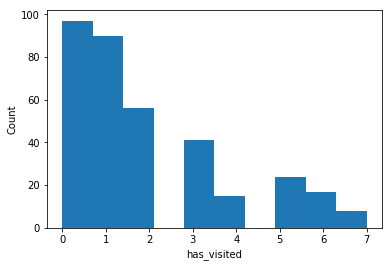

In [274]:
describe_data(failed_data, 'has_visited')


############## lessons_completed ##############
Mean: 0.8620689655172413
Standard deviation: 2.5491599418312028
Minimum: 0
Maximum: 27
############## END ##############


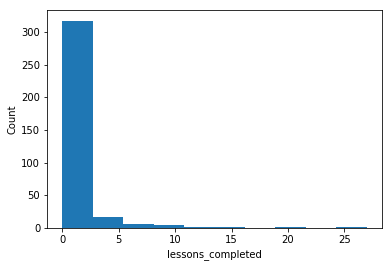

In [275]:
describe_data(failed_data, 'lessons_completed')


############## total_minutes_visited ##############
Mean: 143.32647426675584
Standard deviation: 269.5386190114951
Minimum: 0.0
Maximum: 1768.5227493319999
############## END ##############


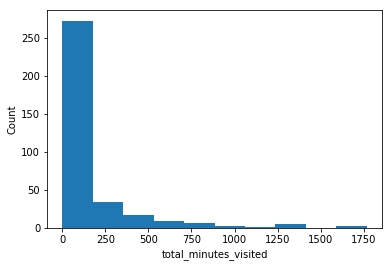

In [276]:
describe_data(failed_data, 'total_minutes_visited')